# Data scraping

In [1]:
%matplotlib widget
import requests
import re
import io
import seaborn as sns
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
from bs4 import BeautifulSoup

In [145]:
def get_information(name, school):
    url = 'https://love-live.fandom.com/wiki/' + name
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    
    def get_data_tabular(field, tag='div'):
        label_element = soup.find_all('h3', text=field)
        assert label_element is not None, 'Cannot find element ' + field
        value = label_element[0].parent.find(tag).text
        assert value is not None, 'Cannot find value for ' + field
        return value
    
    sizes_str = get_data_tabular('Three Sizes')
    sizes_lst = sizes_str.split(',')
    sizes = []
    # Extract numbers from string 
    for size in sizes_lst:
        m = re.search('(\d+)', size)
        sizes.append(int(m.group(1)))
    
    # Get year
    year_str = get_data_tabular('Year')
    year_map = {'First Year': 1, 'Second Year': 2, 'Third Year': 3}
    year = year_map[year_str]
    
    # Get height
    height_str = get_data_tabular('Height')
    m = re.search('(\d+)', height_str)
    height = int(m.group(1))
    
    # Get icon
    label_element = soup.find_all('h3', text='Icon')
    icon_url = label_element[0].parent.find('div').find('a')['href']
    
    return {
        'name': name, 
        'year': year,
        'bust': sizes[0], 
        'hip': sizes[1],
        'waist': sizes[2],
        'height': height,
        'school': school, 
        'icon_url': icon_url
    }
    

In [138]:
students = {
    'Otonokizaka': ['Honoka_Kosaka', 'Umi_Sonoda', 'Rin_Hoshizora', 'Kotori_Minami', 'Maki_Nishikino', 'Hanayo_Koizumi', 'Nico_Yazawa', 'Eli_Ayase', 'Nozomi_Tojo'], 
    'Uranohoshi': ['Chika_Takami', 'Riko_Sakurauchi', 'You_Watanabe', 'Ruby_Kurosawa', 'Yoshiko_Tsushima', 'Hanamaru_Kunikida', 'Dia_Kurosawa', 'Mari_Ohara', 'Kanan_Matsuura'], 
    'Nijigasaki': ['Ayumu_Uehara', 'Setsuna_Yuki', 'Ai_Miyashita', 'Rina_Tennoji', 'Kasumi_Nakasu', 'Shizuku_Osaka', 'Karin_Asaka', 'Emma_Verde', 'Kanata_Konoe'], 
}

In [146]:
df_data = []
for school in students:
    for student in students[school]:
        print('Processing %s of %s' % (student, school))
        df_data.append(get_information(student, school))

Processing Honoka_Kosaka of Otonokizaka
Processing Umi_Sonoda of Otonokizaka
Processing Rin_Hoshizora of Otonokizaka
Processing Kotori_Minami of Otonokizaka
Processing Maki_Nishikino of Otonokizaka
Processing Hanayo_Koizumi of Otonokizaka
Processing Nico_Yazawa of Otonokizaka
Processing Eli_Ayase of Otonokizaka
Processing Nozomi_Tojo of Otonokizaka
Processing Chika_Takami of Uranohoshi
Processing Riko_Sakurauchi of Uranohoshi
Processing You_Watanabe of Uranohoshi
Processing Ruby_Kurosawa of Uranohoshi
Processing Yoshiko_Tsushima of Uranohoshi
Processing Hanamaru_Kunikida of Uranohoshi
Processing Dia_Kurosawa of Uranohoshi
Processing Mari_Ohara of Uranohoshi
Processing Kanan_Matsuura of Uranohoshi
Processing Ayumu_Uehara of Nijigasaki
Processing Setsuna_Yuki of Nijigasaki
Processing Ai_Miyashita of Nijigasaki
Processing Rina_Tennoji of Nijigasaki
Processing Kasumi_Nakasu of Nijigasaki
Processing Shizuku_Osaka of Nijigasaki
Processing Karin_Asaka of Nijigasaki
Processing Emma_Verde of Ni

In [147]:
df = pd.DataFrame(df_data)
df.to_csv('data.csv', index=False)
df

,name,year,bust,hip,waist,height,school,icon_url
0,Honoka_Kosaka,2,78,58,82,157,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
1,Umi_Sonoda,2,76,58,80,159,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
2,Rin_Hoshizora,1,75,59,80,155,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
3,Kotori_Minami,2,80,58,80,159,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
4,Maki_Nishikino,1,78,56,83,161,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
5,Hanayo_Koizumi,1,82,60,83,156,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
6,Nico_Yazawa,3,74,57,79,154,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
7,Eli_Ayase,3,88,60,84,162,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
8,Nozomi_Tojo,3,90,60,82,159,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
9,Chika_Takami,2,82,59,83,157,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...


# Data analysis

In [2]:
df = pd.read_csv('data.csv', index_col=None)
df

,name,year,bust,hip,waist,height,school,icon_url
0,Honoka_Kosaka,2,78,58,82,157,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
1,Umi_Sonoda,2,76,58,80,159,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
2,Rin_Hoshizora,1,75,59,80,155,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
3,Kotori_Minami,2,80,58,80,159,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
4,Maki_Nishikino,1,78,56,83,161,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
5,Hanayo_Koizumi,1,82,60,83,156,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
6,Nico_Yazawa,3,74,57,79,154,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
7,Eli_Ayase,3,88,60,84,162,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
8,Nozomi_Tojo,3,90,60,82,159,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...
9,Chika_Takami,2,82,59,83,157,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...


## BHW distribution by schools

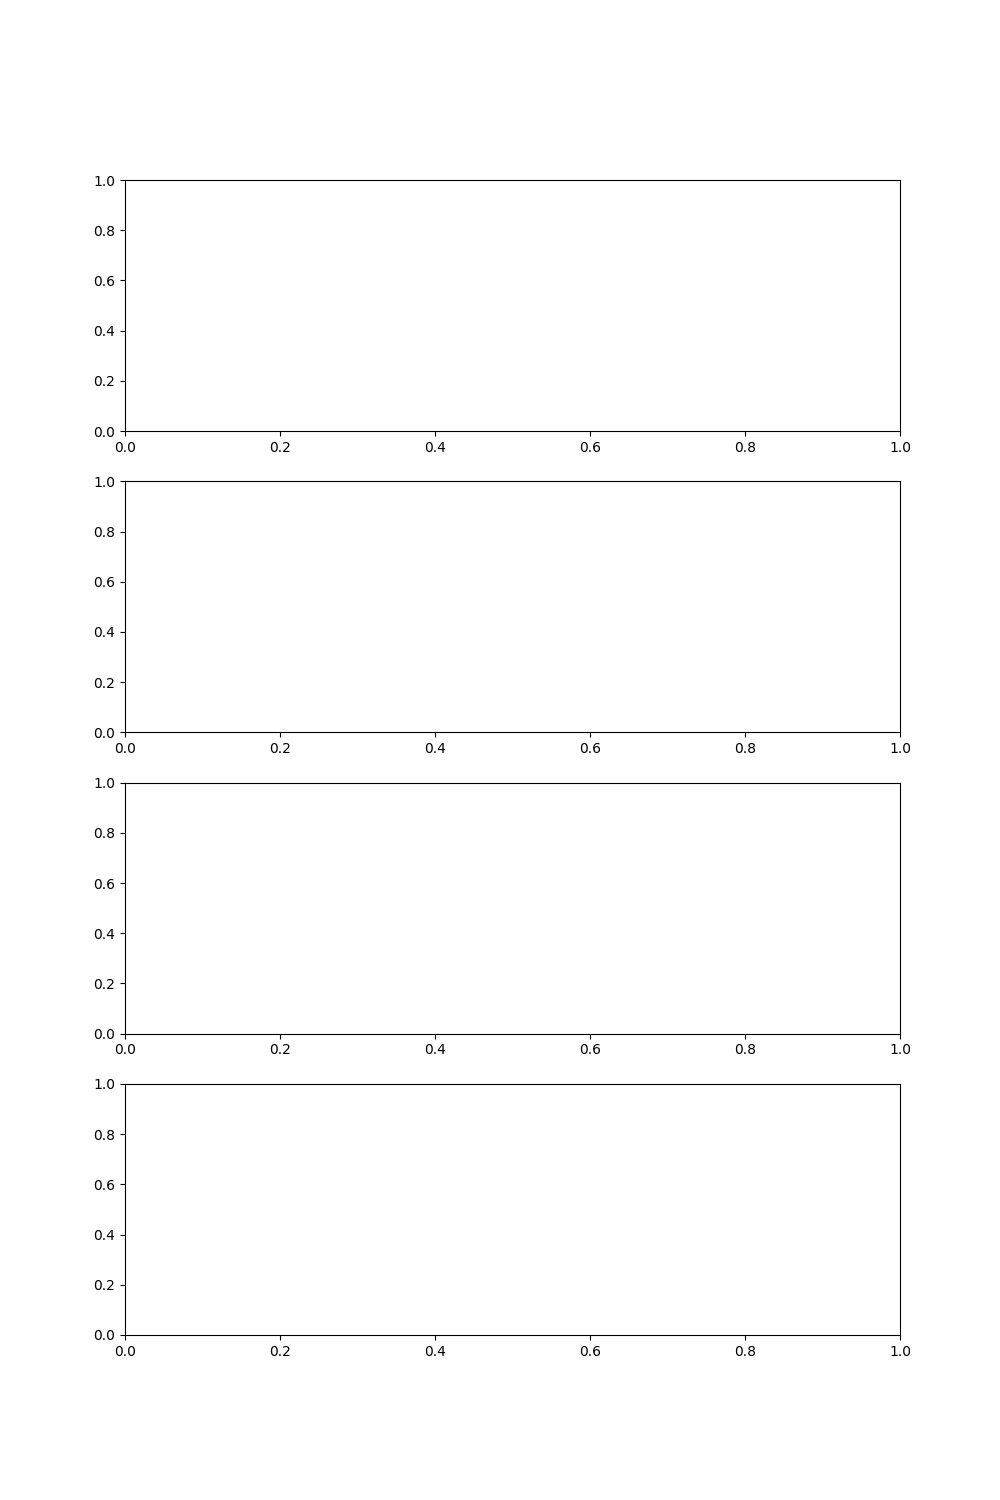

In [38]:
fig, ax = plt.subplots(4, 1, figsize=(10, 15))
bust_ax, hip_ax, waist_ax, height_ax = ax

In [39]:
bust_ax.set_title('Bust distribution')
waist_ax.set_title('Waist distribution')
hip_ax.set_title('Hip distribution')
height_ax.set_title('Height distribution')

Text(0.5, 1.0, 'Height distribution')

In [40]:
sns.swarmplot(data=df, x='school', y='bust', hue='school', ax=bust_ax) 
sns.swarmplot(data=df, x='school', y='hip', hue='school', ax=hip_ax) 
sns.swarmplot(data=df, x='school', y='waist', hue='school', ax=waist_ax) 
sns.swarmplot(data=df, x='school', y='height', hue='school', ax=height_ax) 

bust_ax.legend().set_visible(False)
hip_ax.legend().set_visible(False)
waist_ax.legend().set_visible(False)
height_ax.legend().set_visible(False)

plt.subplots_adjust(hspace=0.5)

## BHW distribution by year

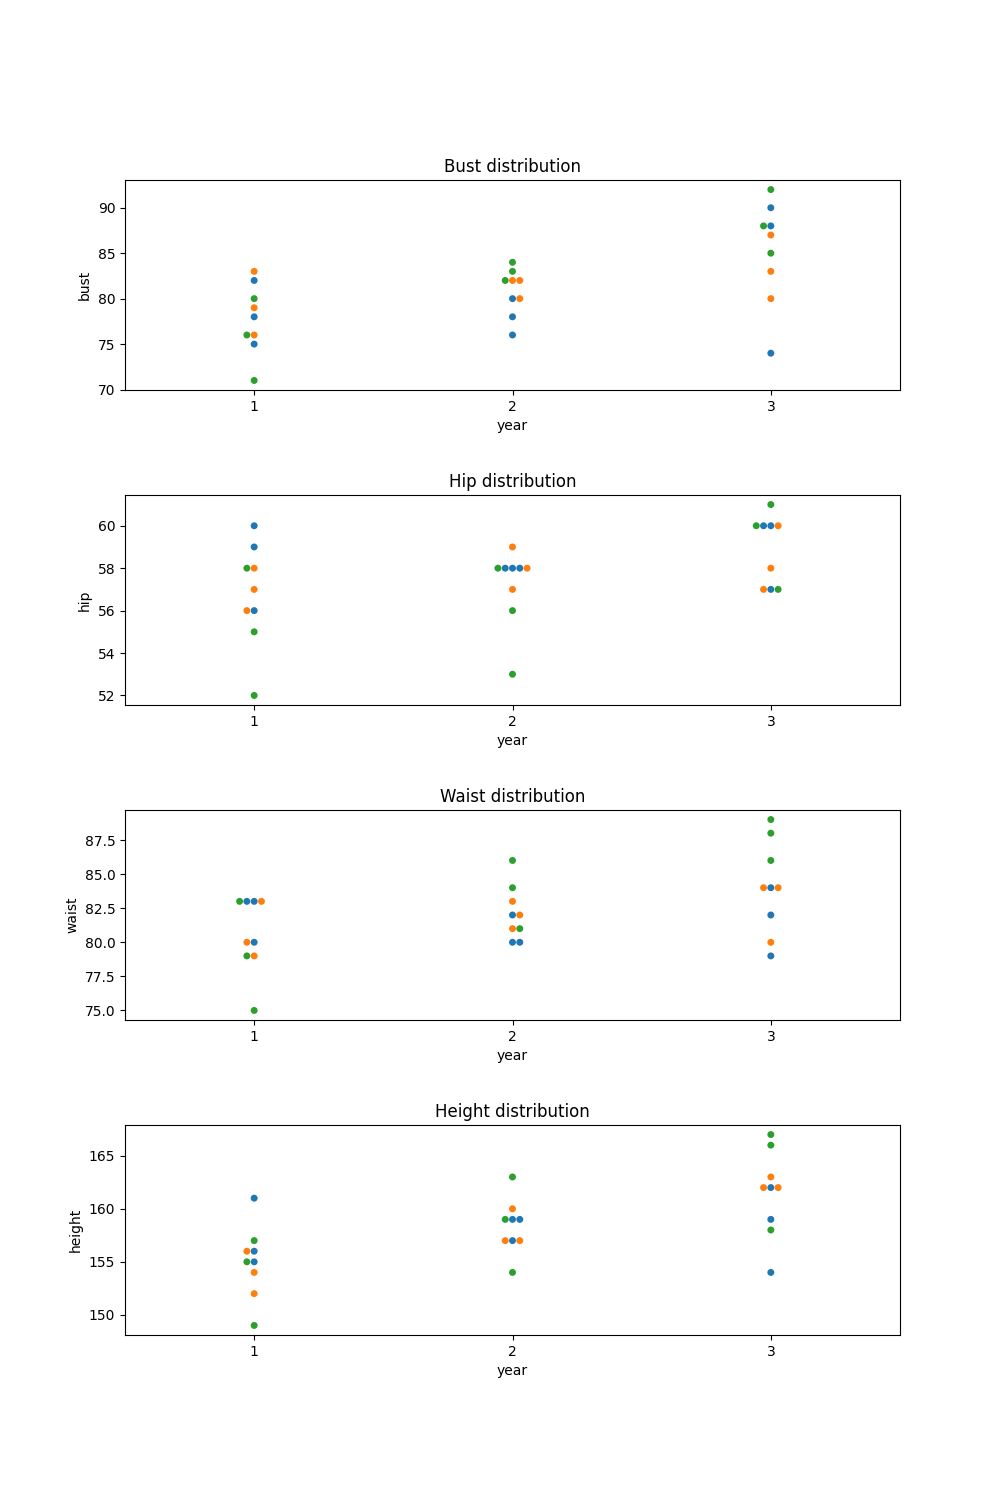

In [41]:
fig, ax = plt.subplots(4, 1, figsize=(10, 15))
bust_ax, hip_ax, waist_ax, height_ax = ax
bust_ax.set_title('Bust distribution')
waist_ax.set_title('Waist distribution')
hip_ax.set_title('Hip distribution')
height_ax.set_title('Height distribution')

sns.swarmplot(data=df, x='year', y='bust', hue='school', ax=bust_ax) 
sns.swarmplot(data=df, x='year', y='hip', hue='school', ax=hip_ax) 
sns.swarmplot(data=df, x='year', y='waist', hue='school', ax=waist_ax) 
sns.swarmplot(data=df, x='year', y='height', hue='school', ax=height_ax) 

bust_ax.legend().set_visible(False)
hip_ax.legend().set_visible(False)
waist_ax.legend().set_visible(False)
height_ax.legend().set_visible(False)

plt.subplots_adjust(hspace=0.5)

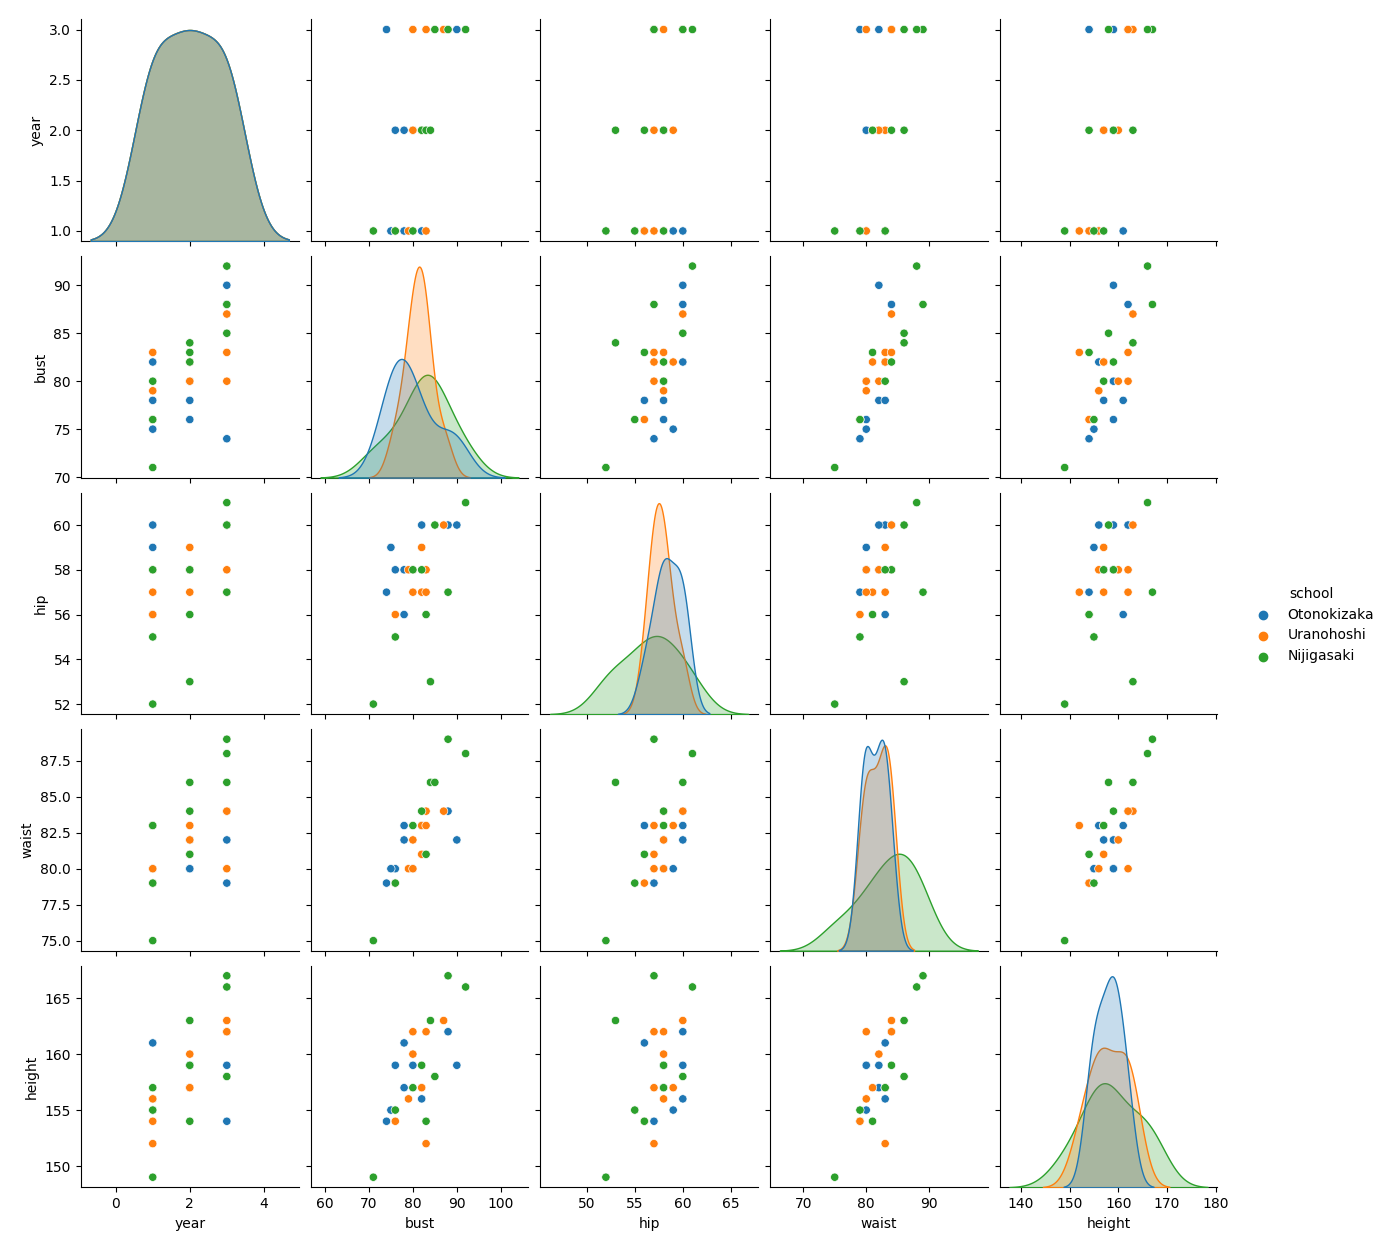

In [57]:
sns.pairplot(data=df, hue='school')

## BHW 3D distribution on school

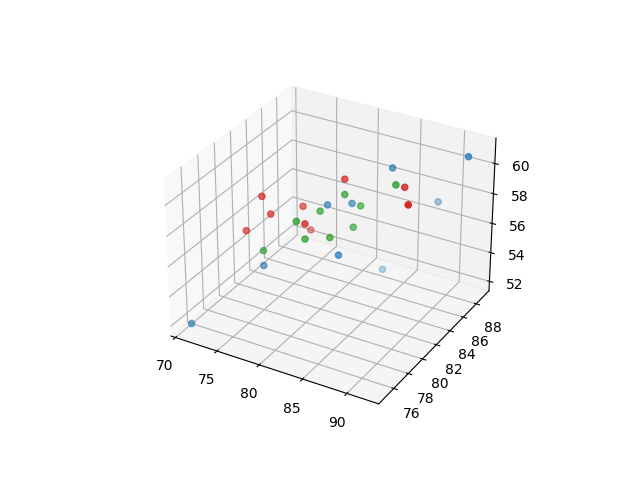

In [62]:
fig = plt.figure()
ax = plt.axes(projection='3d')
hue_map = {'Otonokizaka': 'tab:red', 'Uranohoshi': 'tab:green', 'Nijigasaki': 'tab:blue'}
ax.scatter3D(df['bust'], df['waist'], df['hip'], c=df['school'].map(hue_map))

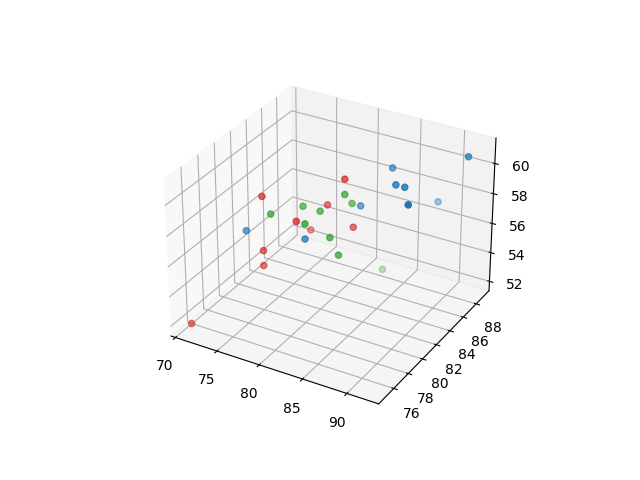

In [64]:
fig = plt.figure()
ax = plt.axes(projection='3d')
hue_map = {1: 'tab:red', 2: 'tab:green', 3: 'tab:blue'}
ax.scatter3D(df['bust'], df['waist'], df['hip'], c=df['year'].map(hue_map))

# Build a KMeans classifier

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [52]:
features = ['bust', 'height', 'year']
df_scaled = pd.DataFrame(df[features])

# df_scaled = (df_scaled - df_scaled.mean()) / df_scaled.std()

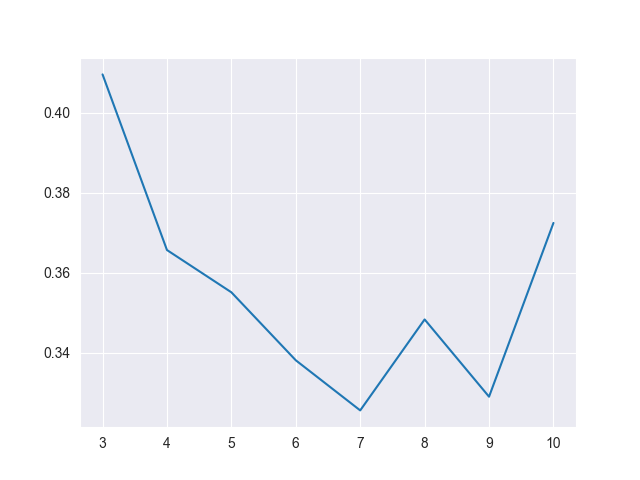

In [53]:
Ks = [3, 4, 5, 6, 7, 8, 9, 10]
silhouette = []

for k in Ks:
    km = KMeans(n_clusters=k, init='k-means++')
    km.fit(df_scaled[features])
    groups = km.predict(df_scaled[features])
    silhouette.append(silhouette_score(df_scaled[features], groups))
plt.figure()
plt.plot(Ks, silhouette)   

In [54]:
km = KMeans(n_clusters=3, init='k-means++')
km.fit(df[features])

groups = km.predict(df[features])
df['group'] = groups
df.sort_values('group')

,name,year,bust,hip,waist,height,school,icon_url,group
0,Honoka_Kosaka,2,78,58,82,157,Otonokizaka,https://static.wikia.nocookie.net/love-live/im...,0
23,Shizuku_Osaka,1,80,58,83,157,Nijigasaki,https://static.wikia.nocookie.net/love-live/im...,0
19,Setsuna_Yuki,2,83,56,81,154,Nijigasaki,https://static.wikia.nocookie.net/love-live/im...,0
18,Ayumu_Uehara,2,82,58,84,159,Nijigasaki,https://static.wikia.nocookie.net/love-live/im...,0
15,Dia_Kurosawa,3,80,57,80,162,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...,0
14,Hanamaru_Kunikida,1,83,57,83,152,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...,0
11,You_Watanabe,2,82,57,81,157,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...,0
10,Riko_Sakurauchi,2,80,58,82,160,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...,0
9,Chika_Takami,2,82,59,83,157,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...,0
13,Yoshiko_Tsushima,1,79,58,80,156,Uranohoshi,https://static.wikia.nocookie.net/love-live/im...,0


/opt/miniconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1242: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


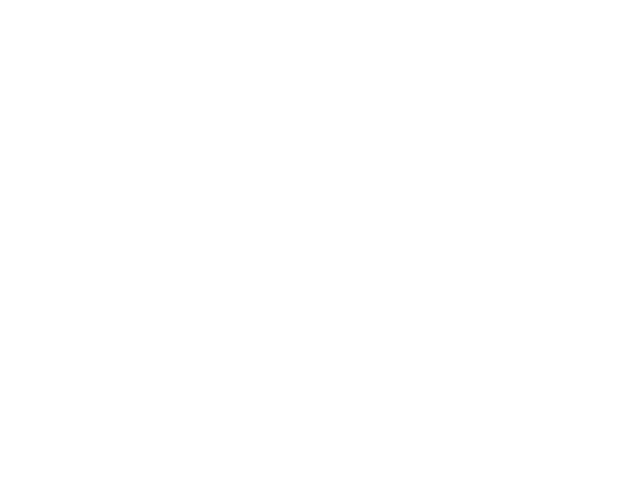

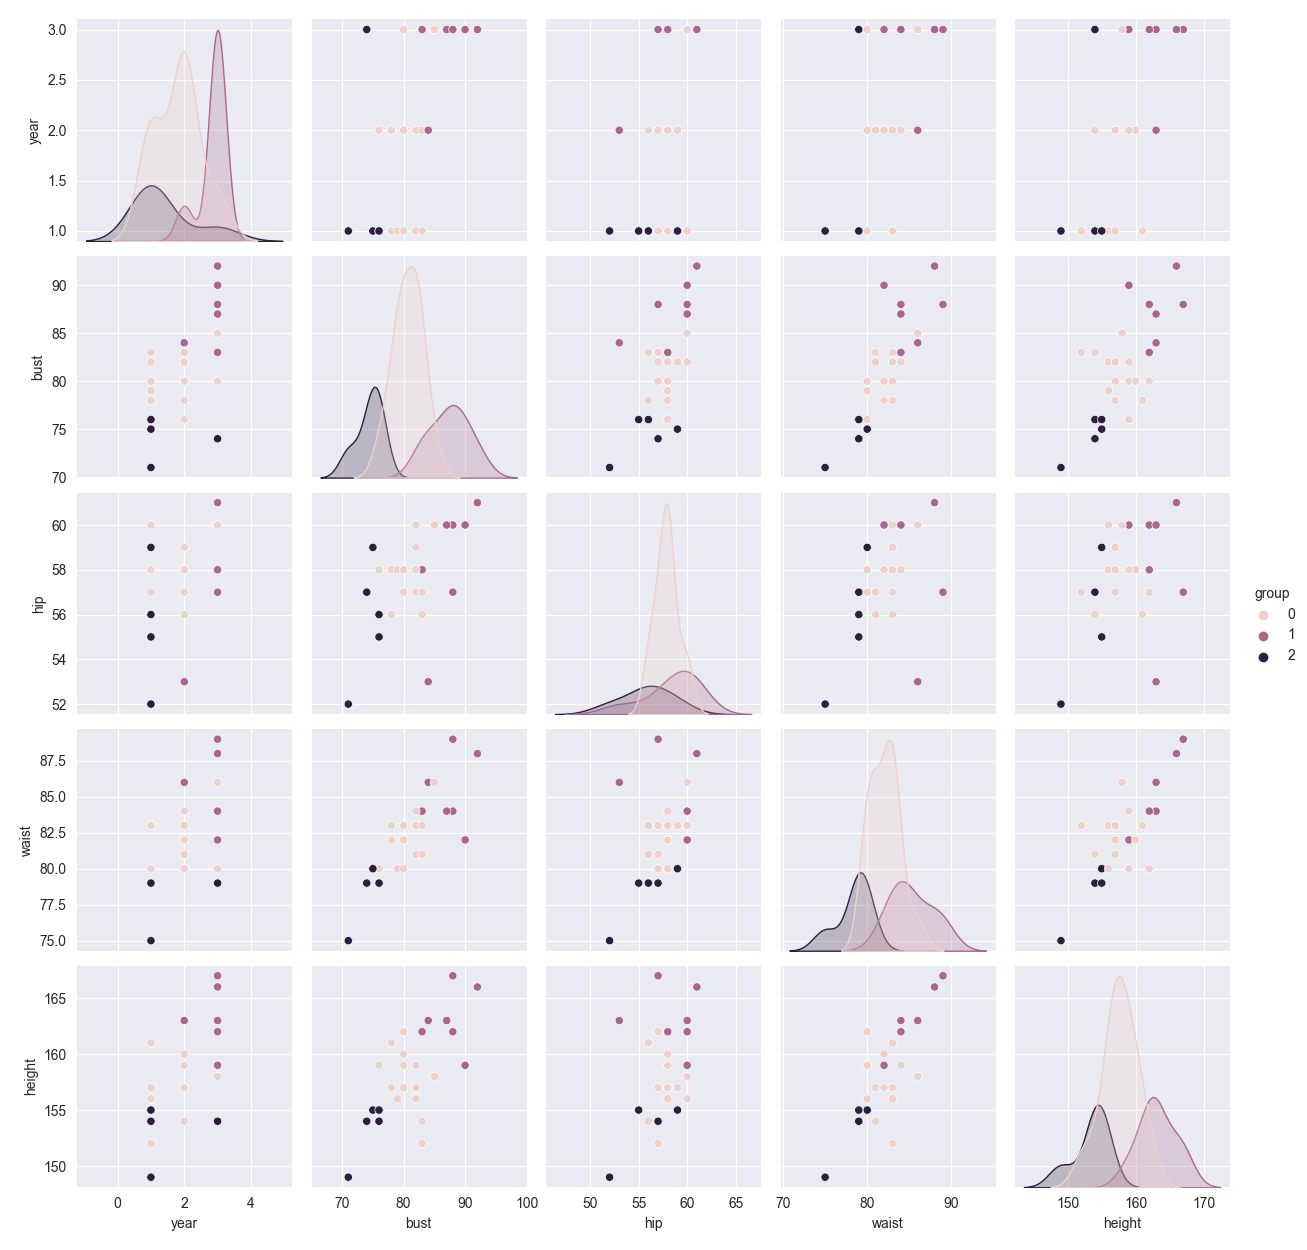

In [55]:
plt.figure()
sns.set_style('darkgrid')
sns.pairplot(data=df, hue='group')